# Project Data Exploration Report
## Student Information
- Name: Your Full Name
- Student Number: Your Student Number
- GitHub Repository: https://github.com/yourusername/yourrepo

## Imports and Load Data

In [42]:
import pandas as pd

# Loading the dataset
file_path = 'World Bank World Development Indicators\world_bank_development_indicators.csv'
data = pd.read_csv(file_path)

## Initial Exploration
### Displaying basic information about the dataset

In [43]:
print("Dataset Info:")
data_info = data.info()
data_info

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvab

In [44]:
print("First 5 rows:")
data.head()

First 5 rows:


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [45]:
print("Dataset columns:")
data_columns = data.columns
data_columns

Dataset columns:


Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

## Data Cleaning

In [46]:
# 1. Removing duplicates
data.drop_duplicates(inplace=True)

In [47]:
# 2. Standardizing column names (removing extra spaces and special characters)
data.columns = data.columns.str.strip().str.lower().str.replace('%', '_percent').str.replace(' ', '_')

In [48]:
# 3. Handling missing values:
# - For columns with significant missing values (>50%), they will be dropped.
# - For numerical columns with moderate missing values, filling with the median.
missing_percent = data.isnull().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index
data.drop(columns=high_missing_cols, inplace=True)

In [49]:
# Filling remaining missing numerical values with median of each column
for col in data.select_dtypes(include='float64').columns:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\Sharaz Haider\AppData\Local\Temp\ipykernel_12860\4256547496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Sharaz Haider\AppData\Local\Temp\ipykernel_12860\4256547496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [50]:
# 4. Converting 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [51]:
# Displaying cleaned data information
cleaned_data_info = data.info()
cleaned_data_columns = data.columns

cleaned_data_info, cleaned_data_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       17272 non-null  object        
 1   date                          17272 non-null  datetime64[ns]
 2   agricultural_land_percent     17272 non-null  float64       
 3   land_area                     17272 non-null  float64       
 4   avg_precipitation             17272 non-null  float64       
 5   trade_in_services_percent     17272 non-null  float64       
 6   population_density            17272 non-null  float64       
 7   inflation_annual_percent      17272 non-null  float64       
 8   military_expenditure_percent  17272 non-null  float64       
 9   gdp_current_us                17272 non-null  float64       
 10  birth_rate                    17272 non-null  float64       
 11  death_rate                  

(None,
 Index(['country', 'date', 'agricultural_land_percent', 'land_area',
        'avg_precipitation', 'trade_in_services_percent', 'population_density',
        'inflation_annual_percent', 'military_expenditure_percent',
        'gdp_current_us', 'birth_rate', 'death_rate',
        'life_expectancy_at_birth', 'population', 'rural_population'],
       dtype='object'))

## Summary Statistics

In [52]:
# Generating descriptive statistics
descriptive_stats = data.describe()

# Calculating the correlation matrix
# Explicitly selecting only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')
# Calculating the correlation matrix only for numeric columns
safe_correlation_matrix = numeric_data.corr()

# Displaying descriptive statistics
print("Descriptive Statistics of Cleaned Data:")
print(descriptive_stats)

Descriptive Statistics of Cleaned Data:
                                date  agricultural_land_percent     land_area  \
count                          17272               17272.000000  1.727200e+04   
mean   1991-09-11 13:11:41.991662848                  37.023089  4.422826e+06   
min              1960-01-01 00:00:00                   0.262821  2.027000e+00   
25%              1976-01-01 00:00:00                  24.041463  2.812000e+04   
50%              1992-01-01 00:00:00                  37.470745  2.419300e+05   
75%              2008-01-01 00:00:00                  47.141348  1.030700e+06   
max              2023-01-01 00:00:00                  93.440750  1.299507e+08   
std                              NaN                  18.970355  1.317801e+07   

       avg_precipitation  trade_in_services_percent  population_density  \
count       17272.000000               17272.000000        17272.000000   
mean         1170.743400                  17.472006          260.717373   
min  

In [53]:
# Displaying the corrected correlation matrix
print("Corrected Correlation Matrix of Numeric Columns:")
print(safe_correlation_matrix)

Corrected Correlation Matrix of Numeric Columns:
                              agricultural_land_percent  land_area  \
agricultural_land_percent                      1.000000   0.002814   
land_area                                      0.002814   1.000000   
avg_precipitation                             -0.268966  -0.045091   
trade_in_services_percent                     -0.123571  -0.136832   
population_density                            -0.031873  -0.051747   
inflation_annual_percent                      -0.006815  -0.006382   
military_expenditure_percent                  -0.035303   0.042783   
gdp_current_us                                 0.009269   0.563221   
birth_rate                                    -0.011522  -0.012115   
death_rate                                     0.120117   0.010012   
life_expectancy_at_birth                      -0.057402  -0.032305   
population                                     0.044935   0.905708   
rural_population                         

## Plots

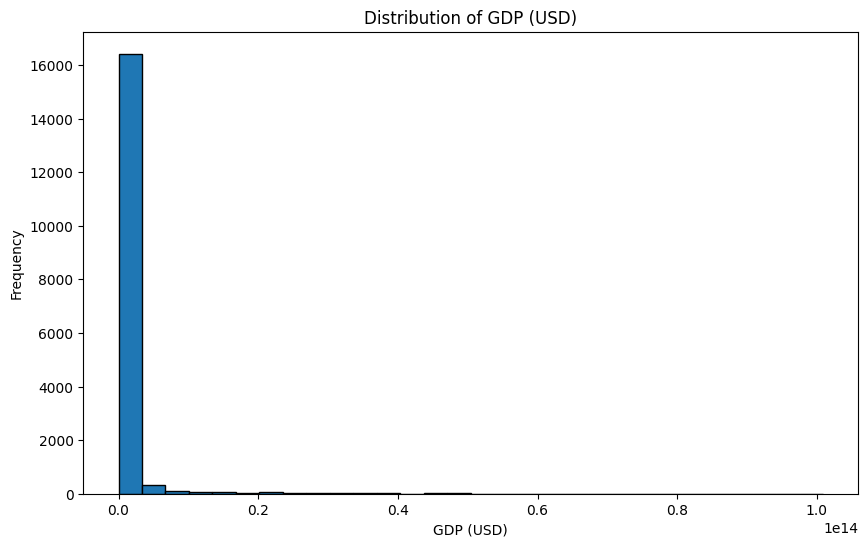

In [54]:
import matplotlib.pyplot as plt

# Plot 1: Histogram - Distribution of GDP (GDP_current_US)
plt.figure(figsize=(10, 6))
plt.hist(data['gdp_current_us'], bins=30, edgecolor='black')
plt.title('Distribution of GDP (USD)')
plt.xlabel('GDP (USD)')
plt.ylabel('Frequency')
plt.show()

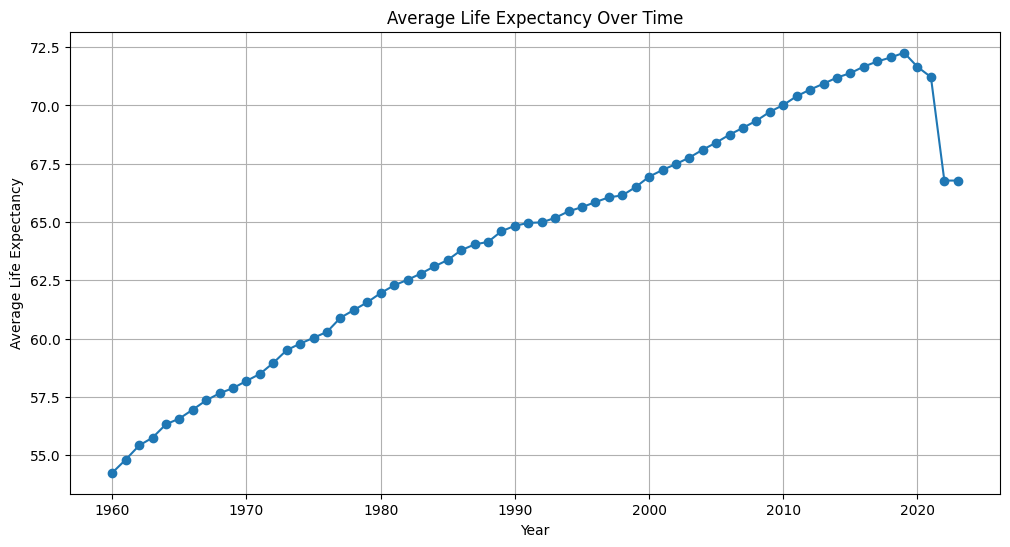

In [55]:
# Plot 2: Line Plot - Average Life Expectancy Over Time

# Aggregating data by year to calculate average life expectancy
data['year'] = data['date'].dt.year
avg_life_expectancy_by_year = data.groupby('year')['life_expectancy_at_birth'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_life_expectancy_by_year['year'], avg_life_expectancy_by_year['life_expectancy_at_birth'], marker='o')
plt.title('Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()


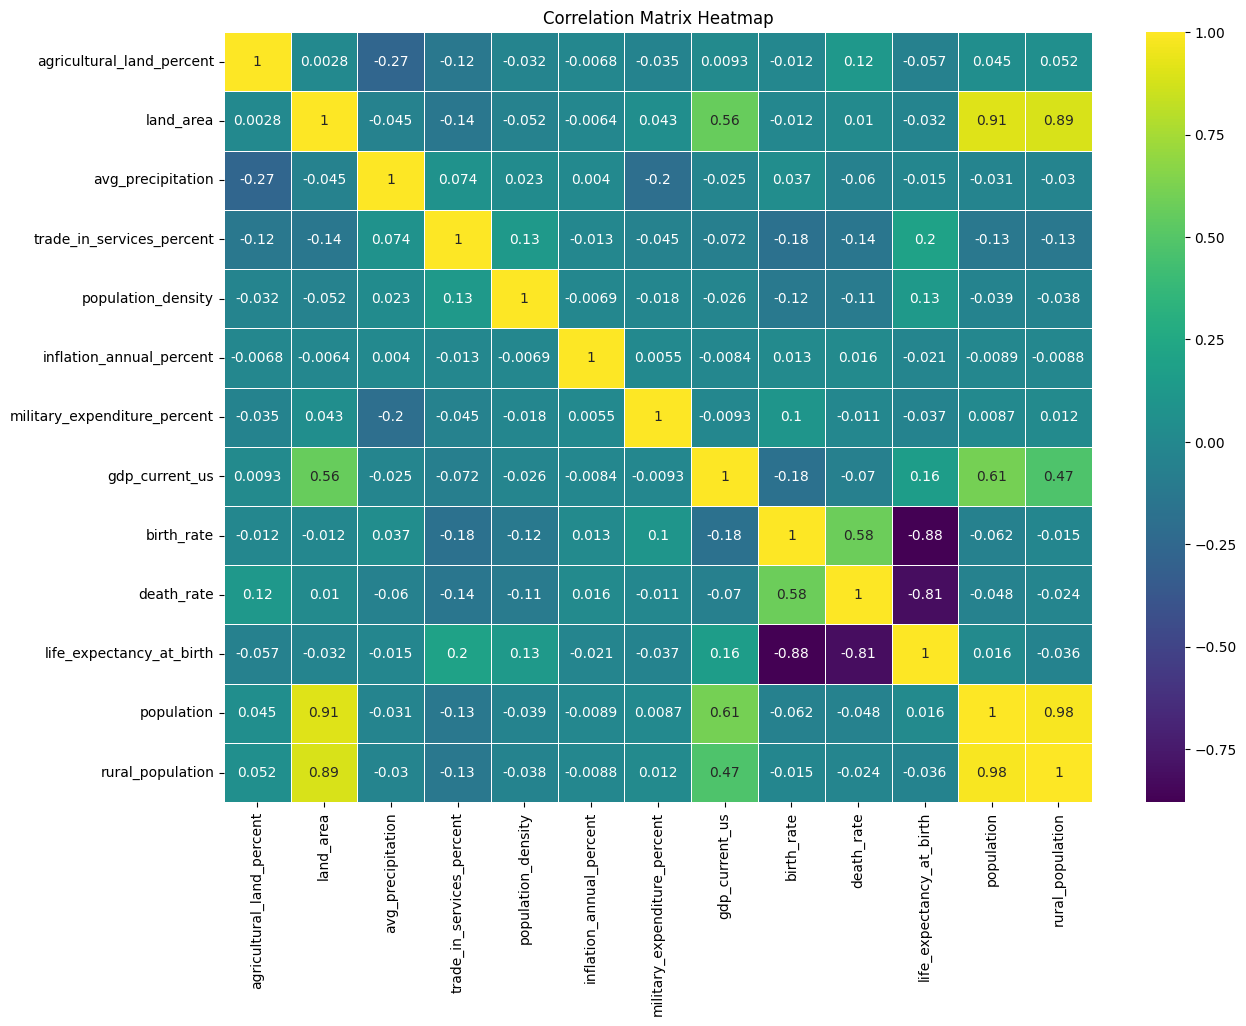

In [56]:
import seaborn as sns

# Plot 3: Heatmap - Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(safe_correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Conclusion
This report explored the World Bank Development Indicators dataset, focusing on various economic, social, and environmental metrics across countries. We performed initial data cleaning to ensure data integrity, followed by a detailed analysis, including descriptive statistics and a correlation analysis. Visualizations, including a histogram, line plot, and heatmap, provided insights into data distribution, temporal trends, and inter-variable relationships.